# 3. 평균모멘텀 전략

In [1]:
import pandas as pd
import numpy as np

# Finance Library import
from Library import FinanceLibrary as fl

### csv 파일 읽어오기

In [2]:
df = pd.read_csv("..\\Data\\KOSPI_Daily_1980data.csv", encoding="utf-8")

### Index는 datetime 형으로 변환하기

In [3]:
df.index = pd.to_datetime(df["Date"])
df.head()
# 시작하는 날짜 지정하기
df = df["2016":]
df_close = df["Close"]
KOSPI = df_close/df_close[0]  #re-scale

In [10]:
# 일별 수익률
daily_return = fl.YesterdayReturn(KOSPI)  #KOSPI 수익률은 금일 청산/어제 진입

In [11]:
# KOSPI 누적수익률
KOSPI = np.cumprod(daily_return)

In [20]:
# 평균모멘텀 누적수익률
average_score = fl.AverageMomentumScore(KOSPI,12)
average_return = daily_return * average_score.shift(1)  # 모멘텀 수익률 * 평균스코어만큼 진입
average_momentum = average_return + (1-average_score.shift(1))  # 평균모멘텀 수익률 = 평균모멘텀 수익률 + 현금(1-average_score)
average_momentum = average_momentum.apply(lambda x: np.NaN if x == 0 else x)
average_momentum = np.cumprod(average_momentum)

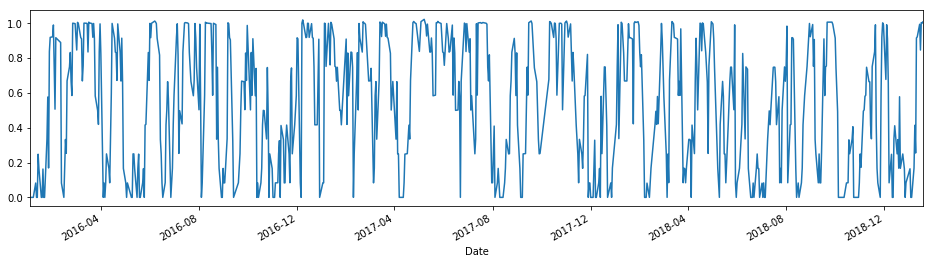

In [21]:
average_return.plot(figsize=(16,4));

In [22]:
kospi = fl.Portfolio(KOSPI,"KOSPI")
average_momentum_cumprod = fl.Portfolio(average_momentum,"Average Momentum")
result = pd.concat([kospi,average_momentum_cumprod],axis=1)
pd.DataFrame(result).T

,Initial Balnce,Final Balance,CAGR,Std,Max.Drawdown,Sharpe Ratio
KOSPI,0.997358,1.100361,2.4875,0.105073,-23.2658,0.021060
Average Momentum,1.000000,0.975865,-0.6089,0.048405,-15.6851,-0.005342


### 그래프

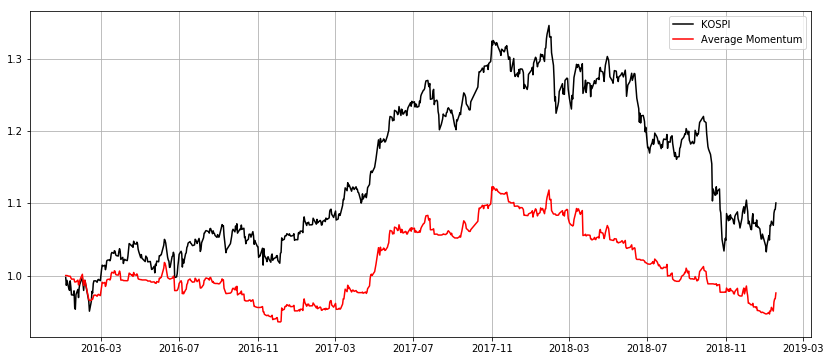

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(14,6))
ax = fig.add_subplot(1,1,1)
ax.plot(KOSPI,color="Black",label="KOSPI");
ax.plot(average_momentum,color="Red",label="Average Momentum");
ax.legend()
ax.grid()